### Problem Statement:

> The goal is to predict if the client will subscribe (1/0) a term deposit (variable y). 
1 = Will subscribe; 
0 = Will not subscribe.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_columns',None)

### Importing and Reading Data

In [8]:
df = pd.read_csv('Bank_Data.csv',sep=';')

In [9]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2994,35,technician,married,professional.course,no,no,no,telephone,may,wed,554,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
15608,34,blue-collar,married,high.school,no,yes,no,telephone,jul,mon,50,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
34136,38,blue-collar,single,basic.9y,no,no,no,cellular,may,wed,654,2,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,yes
23752,45,services,married,professional.course,no,no,no,telephone,aug,thu,64,18,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
25732,40,blue-collar,married,basic.6y,no,yes,no,cellular,nov,wed,1057,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### EDA

#### Checking for unique values for each feature

In [11]:
def unique_value(df,column):
    return np.unique(df[column])

In [12]:
for i in df.columns:
    print('Feature:',i)
    print(unique_value(df,i))

Feature: age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]
Feature: job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Feature: marital
['divorced' 'married' 'single' 'unknown']
Feature: education
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
Feature: default
['no' 'unknown' 'yes']
Feature: housing
['no' 'unknown' 'yes']
Feature: loan
['no' 'unknown' 'yes']
Feature: contact
['cellular' 'telephone']
Feature: month
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Feature: day_of_week
['fri' 'mon' 'thu' 'tue' 'wed']
Feature: duration
[   0    1    2 ... 3785 4199 4918]
Feature: campaign
[ 1  2  3  4  5  6  7  8  9 10 1

In [13]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

we can see that df.education has multiple values having same prefix basic(basic.9y,basic.6y,basic.4y) so we have merged them into one as basic

Replacing yes and no category of target variable with 0 and 1

In [14]:
df['y'] = np.where(df['y']=='yes',1,df['y'])
df['y'] = np.where(df['y']=='no',0,df['y'])
np.unique(df.y)

array([0, 1], dtype=object)

In [15]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35453,36,admin.,married,high.school,unknown,yes,no,cellular,may,mon,284,2,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,0
26542,41,services,married,unknown,no,yes,yes,cellular,nov,thu,597,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
24453,54,admin.,married,high.school,no,yes,no,cellular,nov,mon,287,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
4833,44,admin.,married,high.school,no,no,no,telephone,may,wed,650,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
23172,47,self-employed,married,university.degree,no,no,no,cellular,aug,tue,320,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0


#### Checking for if dataset is balanced or not 

In [16]:
df.value_counts(df.y)

y
0    36548
1     4640
dtype: int64

#### Univariate Analysis

In [17]:
def boxplot(df,column):
    sns.boxplot(y=df[column])
    title = 'Box plot for '+str(column)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

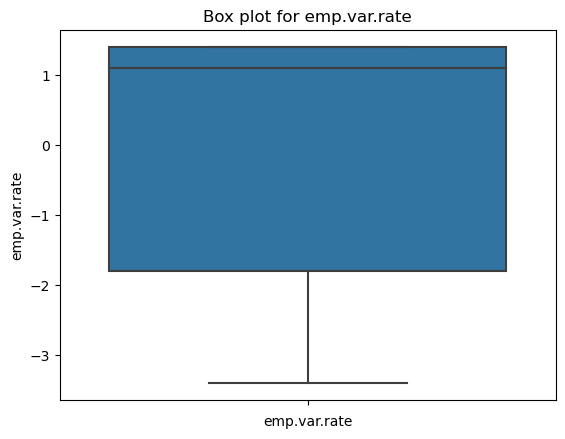

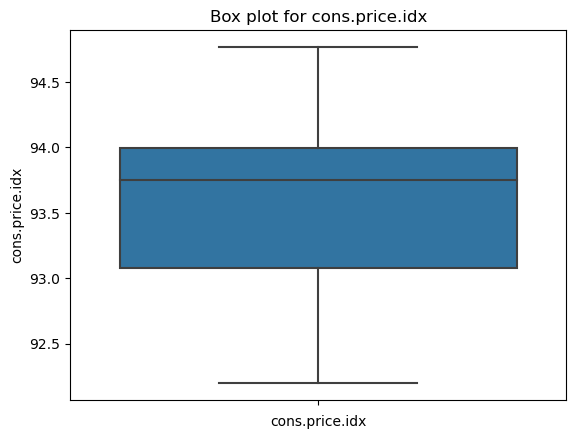

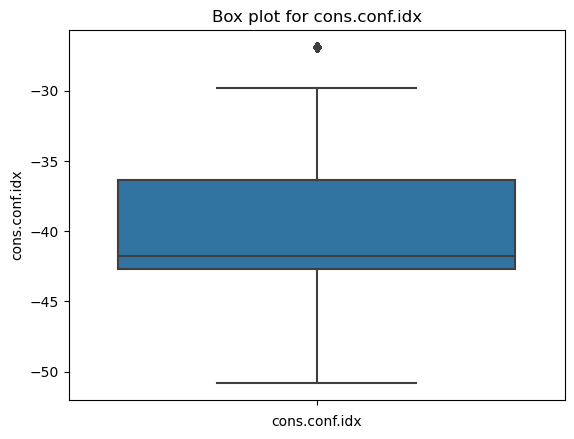

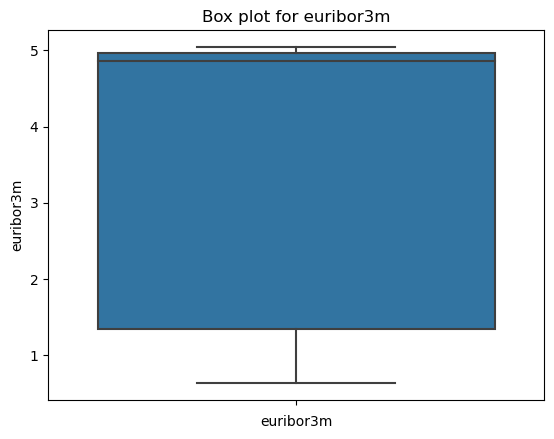

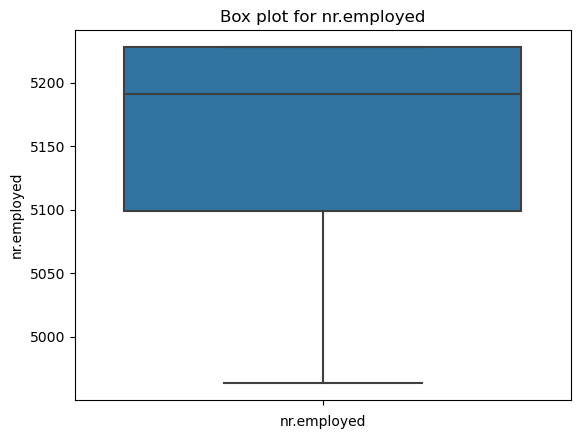

In [18]:
for i in df.columns:
    if df[i].dtypes == 'float64':
        boxplot(df,i)

#### Analysing each Categorical Feature with target variable

In [19]:
def countplot(df,column):
    pd.crosstab(df[column],df['y']).plot(kind='bar')
    title = 'Purchase Frequency for '+str(column)+' Title'
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency of Purchase')
    plt.show()

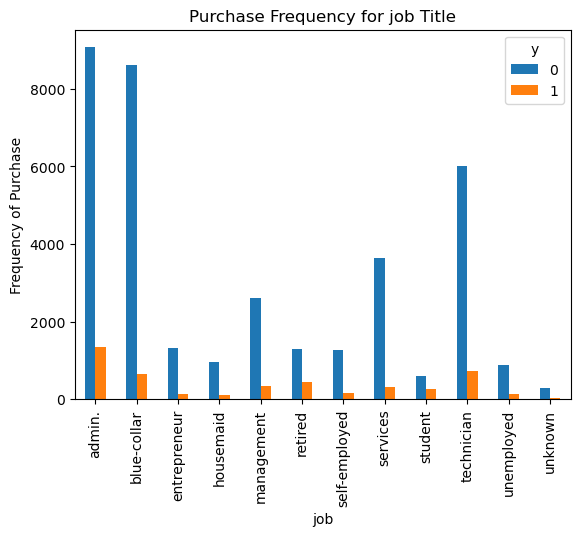

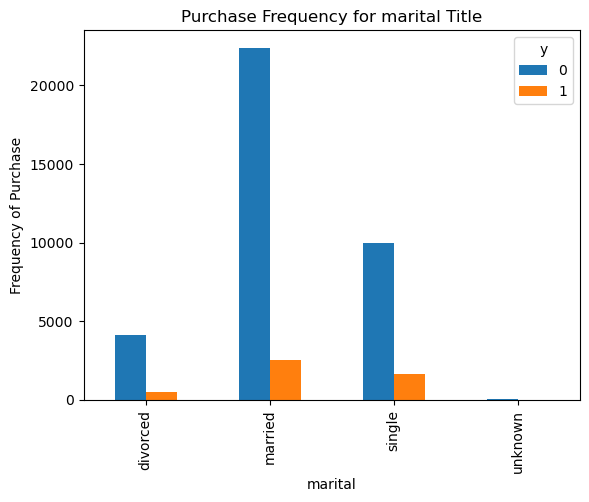

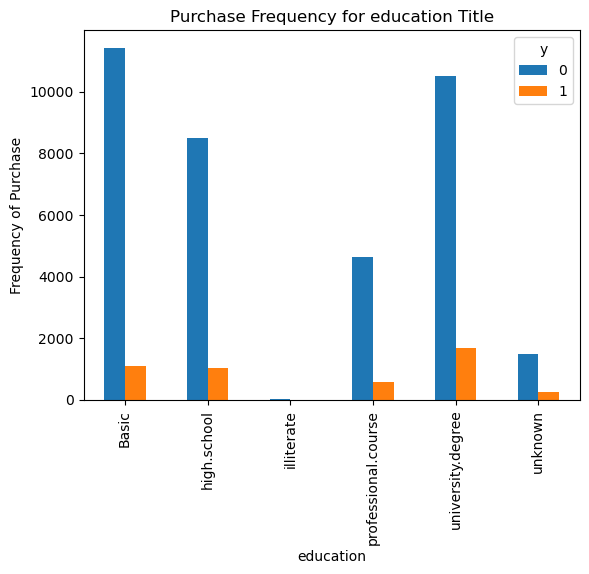

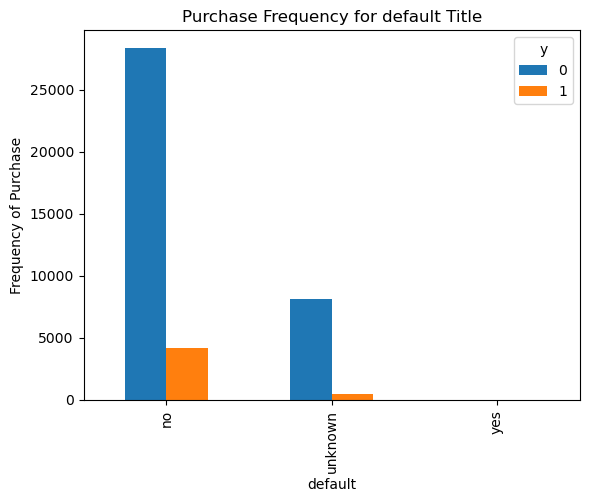

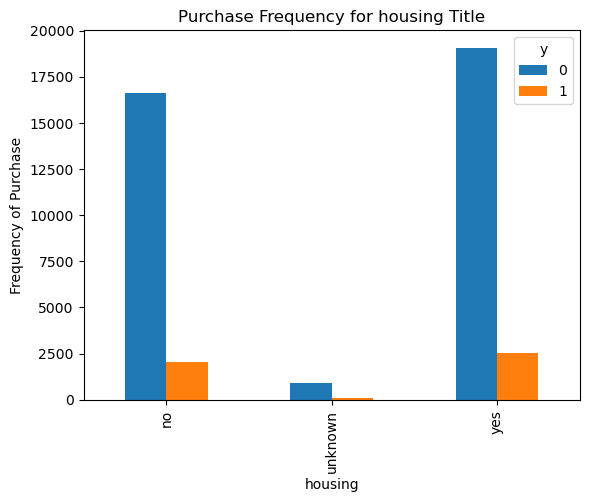

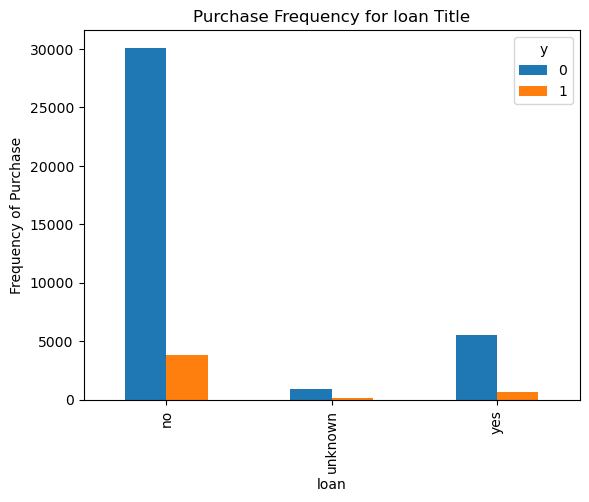

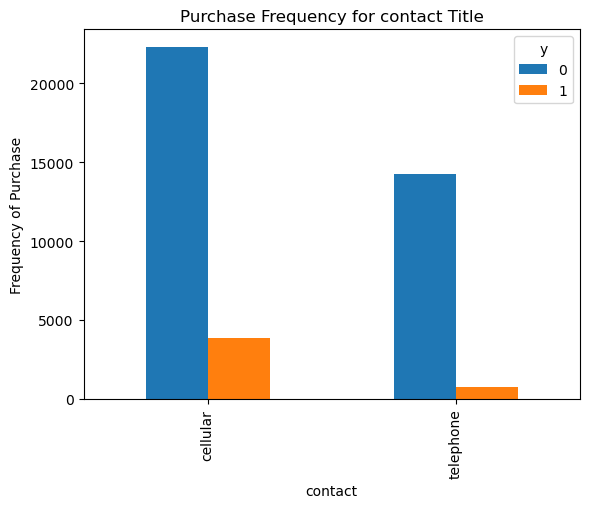

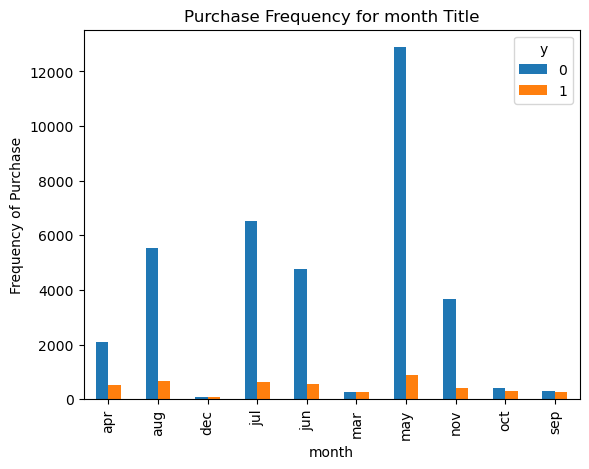

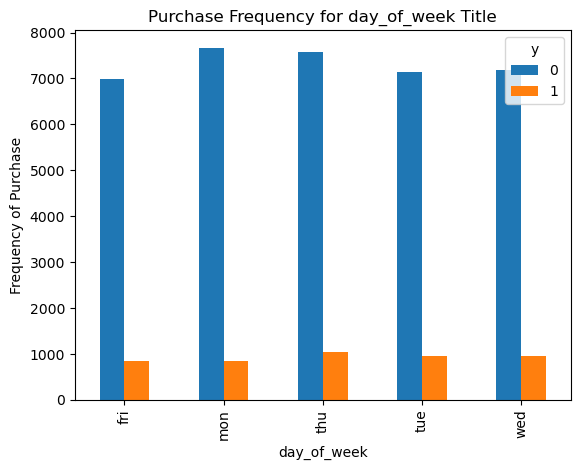

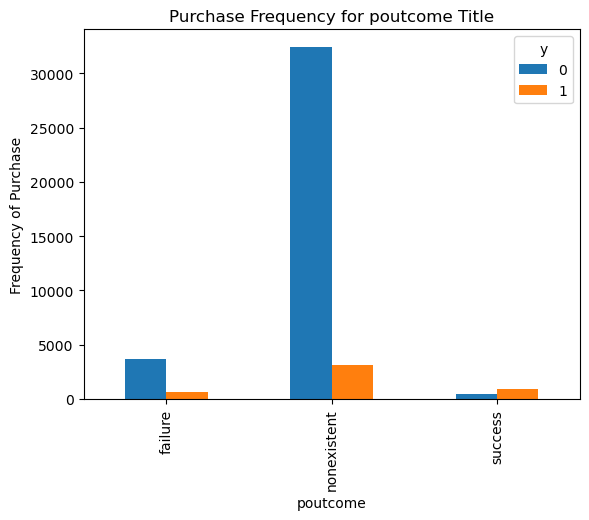

In [20]:
for i in df.columns:
    if df[i].dtypes == 'O' and i!='y':
        countplot(df,i)

#### Creating Dummy Variables

In [21]:
catvars = [i for i in df.columns if df[i].dtype=='O'] 
catvars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [22]:
catvars.remove('y')
catvars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [23]:
df1 = df
for vars in catvars:
    dummy = pd.get_dummies(df[vars],prefix=vars)
    df1 = pd.concat([df1,dummy],axis =1)

In [24]:
df1.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
425,49,blue-collar,married,Basic,no,no,no,telephone,may,tue,102,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [25]:
df.shape,df1.shape,len(catvars)

((41188, 21), (41188, 72), 10)

In [26]:
df1 = df1.drop(catvars,axis=1)
df1.shape

(41188, 62)

In [27]:
df1.sample()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
40214,38,5,1,999,1,-1.7,94.215,-40.3,0.876,4991.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Feature Selection

In [28]:
X = [i for i in df1.columns]
X.remove('y')
y = ['y']

In [29]:
y

['y']

In [30]:
df1.shape

(41188, 62)

In [31]:
# dtree = DecisionTreeClassifier()

# rfe = RFE(estimator=dtree,n_features_to_select=20)
# rfe = rfe.fit(df1[X], df1[y].astype('int32'))
# print(rfe.support_)
# print(rfe.ranking_)

In [32]:
# index_features = [index for index,element in enumerate(rfe.support_) if element == True]

In [33]:
# index_features

In [34]:
# x = df1.iloc[:,index_features]

In [35]:
# y = df1['y'].astype('int32')

In [36]:
x = df1[X].values

In [37]:
x

array([[ 56., 261.,   1., ...,   0.,   1.,   0.],
       [ 57., 149.,   1., ...,   0.,   1.,   0.],
       [ 37., 226.,   1., ...,   0.,   1.,   0.],
       ...,
       [ 56., 189.,   2., ...,   0.,   1.,   0.],
       [ 44., 442.,   1., ...,   0.,   1.,   0.],
       [ 74., 239.,   3., ...,   1.,   0.,   0.]])

In [38]:
y = df1['y'].astype('int32').values

In [39]:
y

array([0, 0, 0, ..., 0, 1, 0])

### Training a Random Forest Model with split size 0.3

#### Test train split

In [40]:
xtrain_3,xtest_3,ytrain_3,ytest_3 = train_test_split(x,y,test_size=0.3,stratify=y,random_state=99)

In [41]:
xtrain_3.shape,xtest_3.shape,ytrain_3.shape,ytest_3.shape

((28831, 61), (12357, 61), (28831,), (12357,))

#### Model training

In [42]:
rfm = RandomForestClassifier()

In [43]:
rfm.fit(xtrain_3, ytrain_3)

RandomForestClassifier()

#### Accuracy

In [45]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm.score(xtrain_3, ytrain_3)))

Accuracy of logistic regression classifier on train set: 1.000


In [46]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on test set: 0.913


#### Dealing with overfitting

In [47]:
rfm = RandomForestClassifier(min_samples_split=25,min_samples_leaf=30)
rfm.fit(xtrain_3, ytrain_3)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm.score(xtrain_3, ytrain_3)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on train set: 0.912
Accuracy of logistic regression classifier on test set: 0.908


In [52]:
rfm = RandomForestClassifier(max_depth=6)
rfm.fit(xtrain_3, ytrain_3)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm.score(xtrain_3, ytrain_3)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on train set: 0.906
Accuracy of logistic regression classifier on test set: 0.904


#### Hyperparameter Tuning

In [53]:
from tqdm import tqdm_notebook

In [56]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini',n_jobs=-1)
    rfc.fit(xtrain_3, ytrain_3)
    rfc_pred = rfc.predict(xtest_3)
    cm = confusion_matrix(ytest_3,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

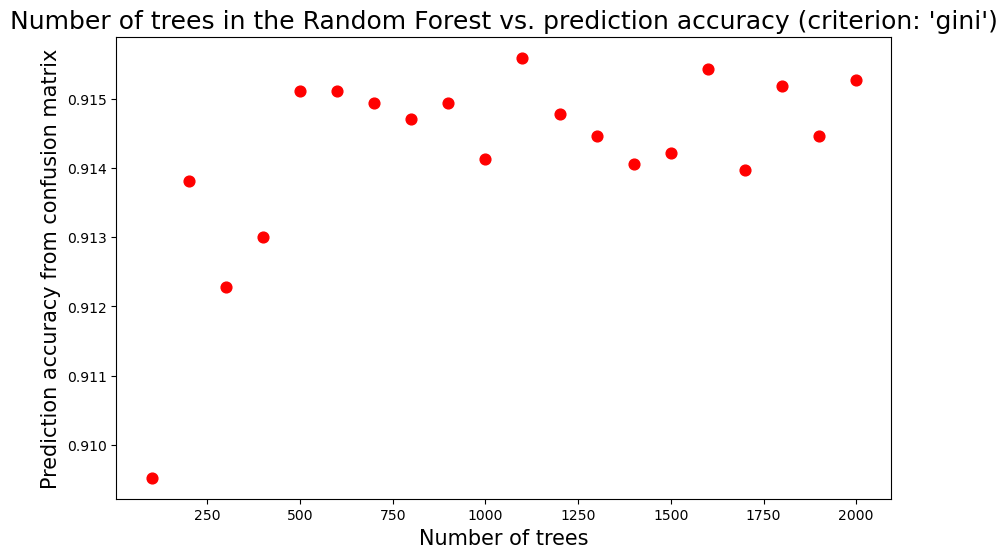

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [58]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='entropy',n_jobs=-1)
    rfc.fit(xtrain_3, ytrain_3)
    rfc_pred = rfc.predict(xtest_3)
    cm = confusion_matrix(ytest_3,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

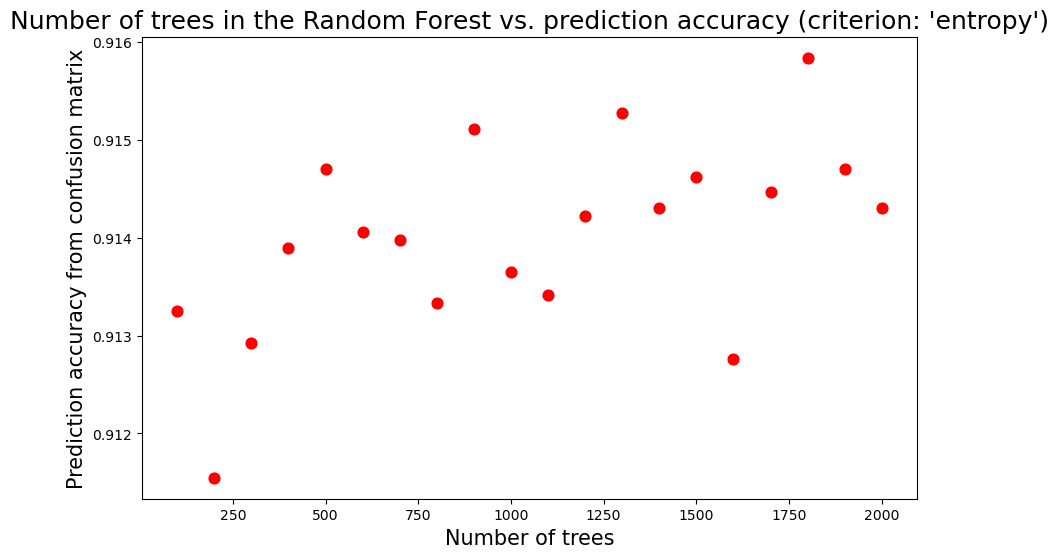

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Confusion Matrix 

In [60]:
ypred_3 = rfm.predict(xtest_3)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [61]:
ytest_3.shape,ypred_3.shape

((12357,), (12357,))

In [62]:
pd.crosstab(ytest_3, ypred_3, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,10897,68,10965
1,1121,271,1392
All,12018,339,12357


#### Metrices Report

In [63]:
print(classification_report(ytest_3, ypred_3))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.80      0.19      0.31      1392

    accuracy                           0.90     12357
   macro avg       0.85      0.59      0.63     12357
weighted avg       0.89      0.90      0.88     12357



In [64]:
y_pred_proba_3 = rfm.predict_proba(xtest_3)
y_pred_proba_3

array([[0.96437891, 0.03562109],
       [0.49456782, 0.50543218],
       [0.77716989, 0.22283011],
       ...,
       [0.66995731, 0.33004269],
       [0.75858938, 0.24141062],
       [0.66903111, 0.33096889]])

In [65]:
y_pred_proba_3 = y_pred_proba_3[:,1]
y_pred_proba_3

array([0.03562109, 0.50543218, 0.22283011, ..., 0.33004269, 0.24141062,
       0.33096889])

#### ROC curve and AUC

In [66]:
# Calculate ROC curve and AUC
roc_auc_3 = roc_auc_score(ytest_3, y_pred_proba_3)
roc_auc_3

0.9280467566604296

In [67]:
fpr_3, tpr_3, thresholds_3 = roc_curve(ytest_3, y_pred_proba_3)

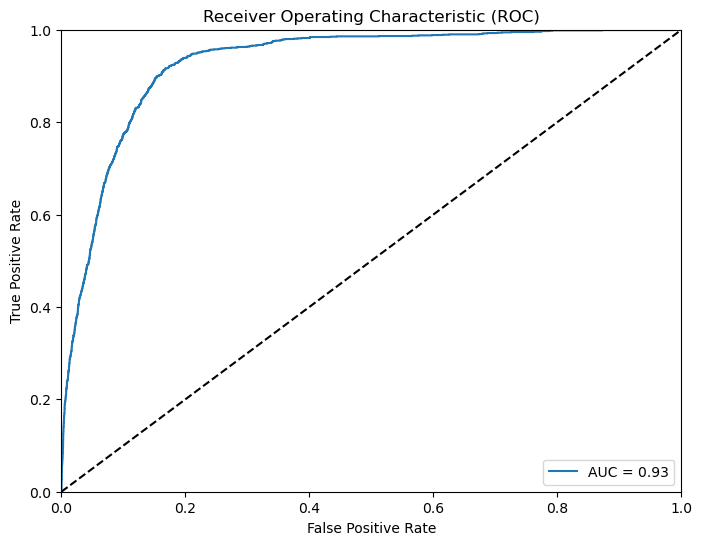

In [68]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_3, tpr_3, label=f'AUC = {roc_auc_3:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [69]:
# Calculate precision-recall curve
precision_3, recall_3, thresholds_3 = precision_recall_curve(ytest_3, y_pred_proba_3)
pr_auc_3 = auc(recall_3, precision_3)

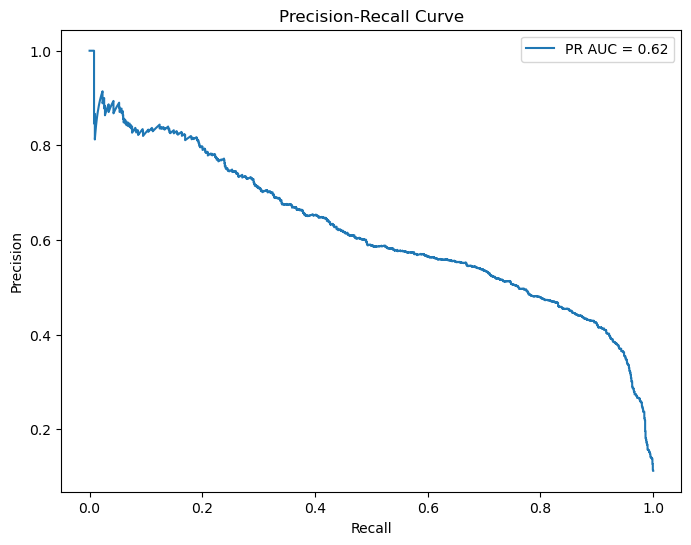

In [70]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_3, precision_3, label=f'PR AUC = {pr_auc_3:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# ============================================================================================

### Training a Decision Tree Model with split size 0.25

#### Test train split

In [71]:
xtrain_25,xtest_25,ytrain_25,ytest_25 = train_test_split(x,y,test_size=0.25,stratify=y,random_state=99)

In [72]:
xtrain_25.shape,xtest_25.shape,ytrain_25.shape,ytest_25.shape

((30891, 61), (10297, 61), (30891,), (10297,))

#### Model training

In [73]:
rfm_25 = RandomForestClassifier()

In [74]:
rfm_25.fit(xtrain_25, ytrain_25)

RandomForestClassifier()

#### Accuracy

In [75]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_25.score(xtrain_25, ytrain_25)))

Accuracy of logistic regression classifier on train set: 1.000


In [76]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on test set: 0.913


#### Dealing with overfitting

In [78]:
rfm_25 = RandomForestClassifier(min_samples_split=25,min_samples_leaf=30)
rfm_25.fit(xtrain_25, ytrain_25)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_25.score(xtrain_25, ytrain_25)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on train set: 0.912
Accuracy of logistic regression classifier on test set: 0.907


In [79]:
rfm_25 = RandomForestClassifier(max_depth=5)
rfm_25.fit(xtrain_25, ytrain_25)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_25.score(xtrain_25, ytrain_25)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on train set: 0.904
Accuracy of logistic regression classifier on test set: 0.902


#### Hyperparameter Tuning

In [80]:
from tqdm import tqdm_notebook

In [81]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini',n_jobs=-1)
    rfc.fit(xtrain_25, ytrain_25)
    rfc_pred = rfc.predict(xtest_25)
    cm = confusion_matrix(ytest_25,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

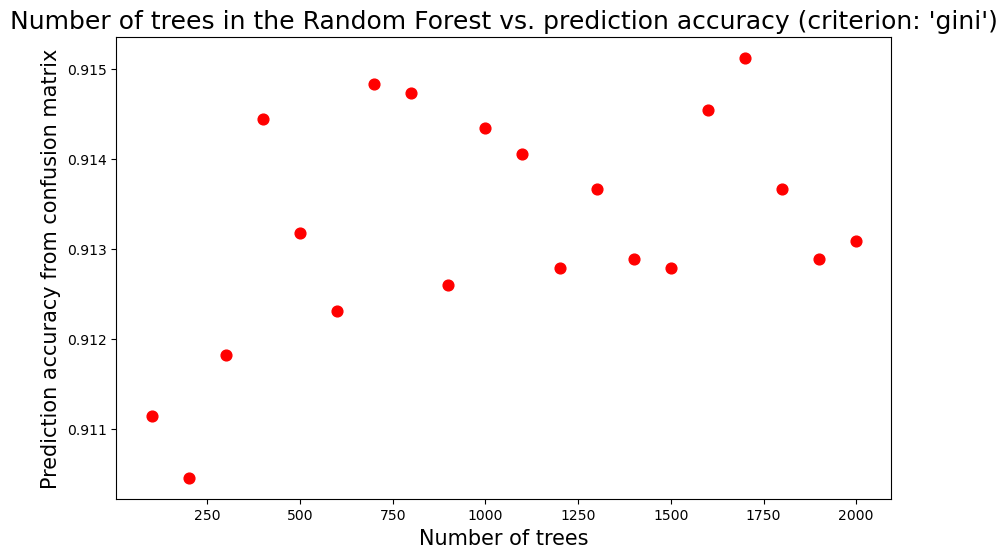

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [83]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='entropy',n_jobs=-1)
    rfc.fit(xtrain_25, ytrain_25)
    rfc_pred = rfc.predict(xtest_25)
    cm = confusion_matrix(ytest_25,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

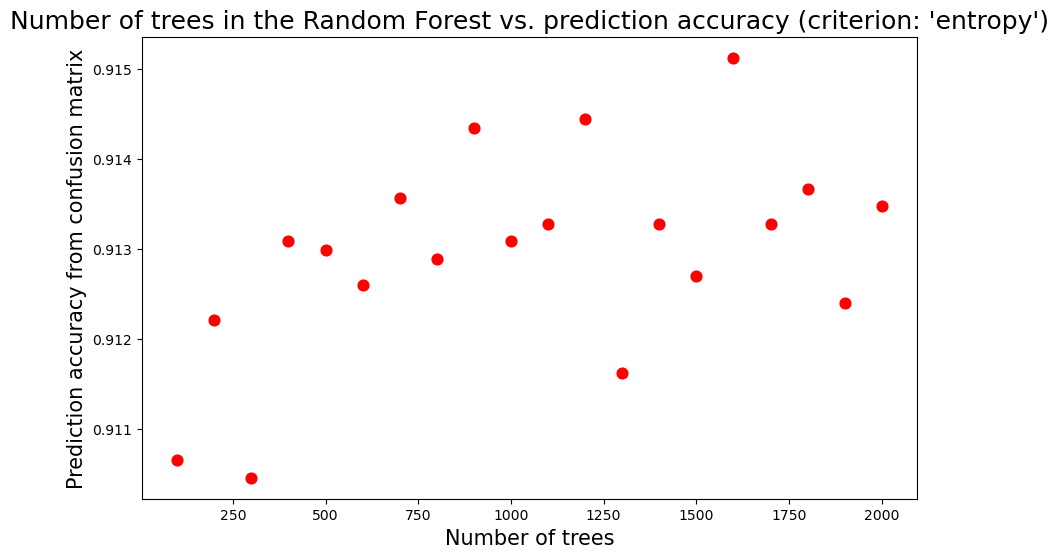

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Confusion Matrix 

In [86]:
ypred_25 = rfm_25.predict(xtest_25)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [87]:
ytest_25.shape,ypred_25.shape

((10297,), (10297,))

In [88]:
pd.crosstab(ytest_25, ypred_25, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,9079,58,9137
1,947,213,1160
All,10026,271,10297


#### Metrices Report

In [89]:
print(classification_report(ytest_25, ypred_25))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9137
           1       0.79      0.18      0.30      1160

    accuracy                           0.90     10297
   macro avg       0.85      0.59      0.62     10297
weighted avg       0.89      0.90      0.87     10297



In [90]:
y_pred_proba_25 = rfm_25.predict_proba(xtest_25)
y_pred_proba_25

array([[0.96248489, 0.03751511],
       [0.66928723, 0.33071277],
       [0.96987475, 0.03012525],
       ...,
       [0.97299699, 0.02700301],
       [0.95466004, 0.04533996],
       [0.97232586, 0.02767414]])

In [91]:
y_pred_proba_25 = y_pred_proba_25[:,1]
y_pred_proba_25

array([0.03751511, 0.33071277, 0.03012525, ..., 0.02700301, 0.04533996,
       0.02767414])

#### ROC curve and AUC

In [92]:
# Calculate ROC curve and AUC
roc_auc_25 = roc_auc_score(ytest_25, y_pred_proba_25)
roc_auc_25

0.9230120144316591

In [93]:
fpr_25, tpr_25, thresholds_25 = roc_curve(ytest_25, y_pred_proba_25)

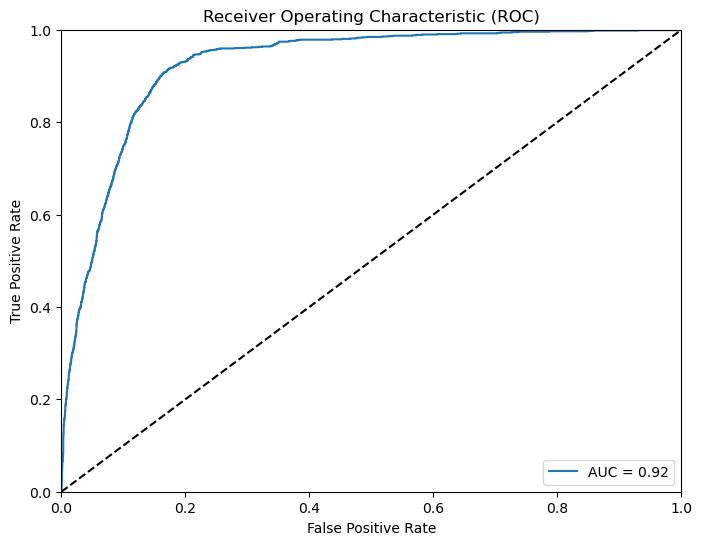

In [94]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_25, tpr_25, label=f'AUC = {roc_auc_25:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [95]:
# Calculate precision-recall curve
precision_25, recall_25, thresholds_25 = precision_recall_curve(ytest_25, y_pred_proba_25)
pr_auc_25 = auc(recall_25, precision_25)

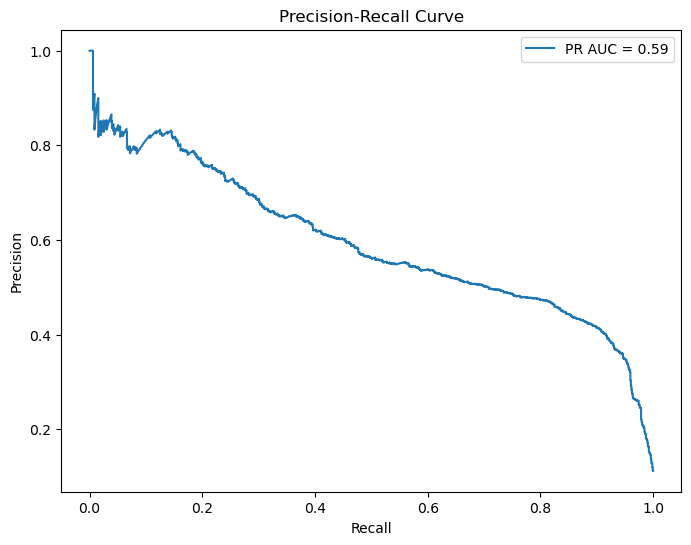

In [96]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_25, precision_25, label=f'PR AUC = {pr_auc_25:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# ===================================================================

### Training a Decision Tree Model with split size 0.2

#### Test train split

In [97]:
xtrain_2,xtest_2,ytrain_2,ytest_2 = train_test_split(x,y,test_size=0.2,stratify=y,random_state=99)

In [98]:
xtrain_2.shape,xtest_2.shape,ytrain_2.shape,ytest_2.shape

((32950, 61), (8238, 61), (32950,), (8238,))

#### Model training

In [99]:
rfm_2 = RandomForestClassifier()

In [100]:
rfm_2.fit(xtrain_2, ytrain_2)

RandomForestClassifier()

#### Accuracy

In [101]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_2.score(xtrain_2, ytrain_2)))

Accuracy of logistic regression classifier on train set: 1.000


In [102]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on test set: 0.913


#### Dealing with overfitting

In [103]:
rfm_2 = RandomForestClassifier(min_samples_split=25,min_samples_leaf=30)
rfm_2.fit(xtrain_2, ytrain_2)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_2.score(xtrain_2, ytrain_2)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on train set: 0.912
Accuracy of logistic regression classifier on test set: 0.906


In [104]:
rfm_2 = RandomForestClassifier(max_depth=5)
rfm_2.fit(xtrain_2, ytrain_2)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_2.score(xtrain_2, ytrain_2)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on train set: 0.904
Accuracy of logistic regression classifier on test set: 0.902


#### Hyperparameter Tuning

In [105]:
from tqdm import tqdm_notebook

In [106]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini',n_jobs=-1)
    rfc.fit(xtrain_2, ytrain_2)
    rfc_pred = rfc.predict(xtest_2)
    cm = confusion_matrix(ytest_2,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

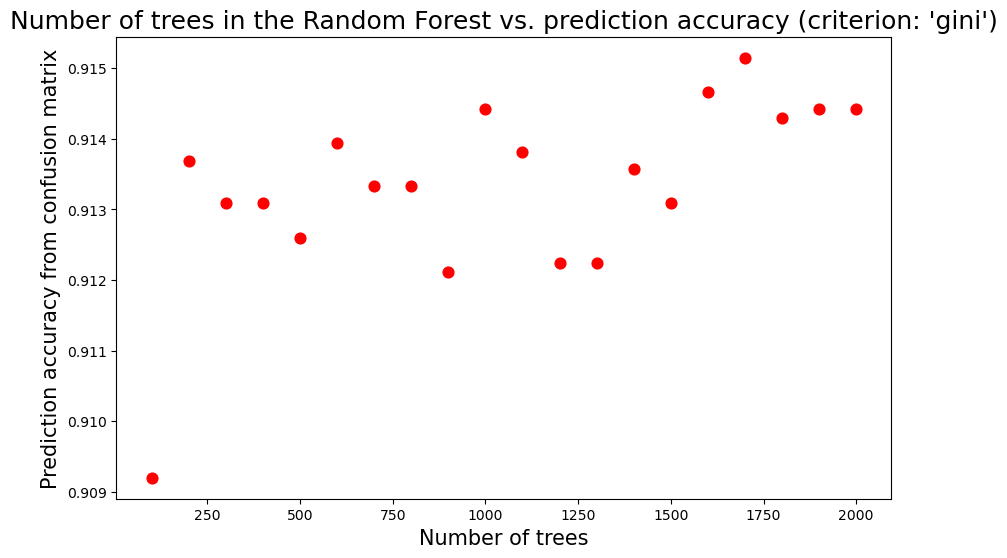

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [108]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='entropy',n_jobs=-1)
    rfc.fit(xtrain_2, ytrain_2)
    rfc_pred = rfc.predict(xtest_2)
    cm = confusion_matrix(ytest_2,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

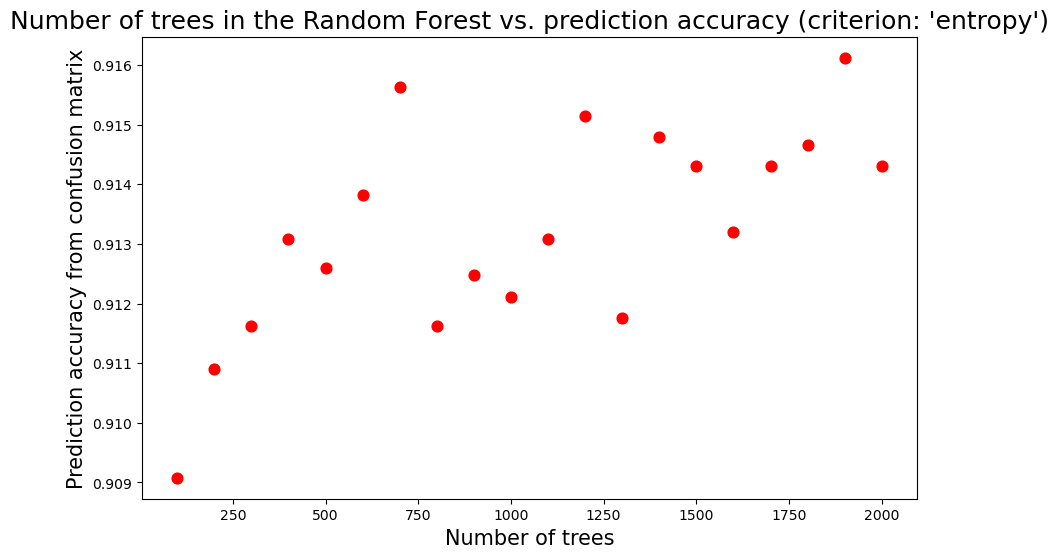

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Confusion Matrix 

In [110]:
ypred_2 = rfm_2.predict(xtest_2)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [111]:
ytest_2.shape,ypred_2.shape

((8238,), (8238,))

In [112]:
pd.crosstab(ytest_2, ypred_2, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,7262,48,7310
1,763,165,928
All,8025,213,8238


#### Metrices Report

In [113]:
print(classification_report(ytest_2, ypred_2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7310
           1       0.77      0.18      0.29       928

    accuracy                           0.90      8238
   macro avg       0.84      0.59      0.62      8238
weighted avg       0.89      0.90      0.87      8238



In [114]:
y_pred_proba_2 = rfm_2.predict_proba(xtest_2)
y_pred_proba_2

array([[0.95687405, 0.04312595],
       [0.71202432, 0.28797568],
       [0.91629169, 0.08370831],
       ...,
       [0.9684136 , 0.0315864 ],
       [0.76958534, 0.23041466],
       [0.7583025 , 0.2416975 ]])

In [115]:
y_pred_proba_2 = y_pred_proba_2[:,1]
y_pred_proba_2

array([0.04312595, 0.28797568, 0.08370831, ..., 0.0315864 , 0.23041466,
       0.2416975 ])

#### ROC curve and AUC

In [116]:
# Calculate ROC curve and AUC
roc_auc_2 = roc_auc_score(ytest_2, y_pred_proba_2)
roc_auc_2

0.918601408085287

In [117]:
fpr_2, tpr_2, thresholds_2 = roc_curve(ytest_2, y_pred_proba_2)

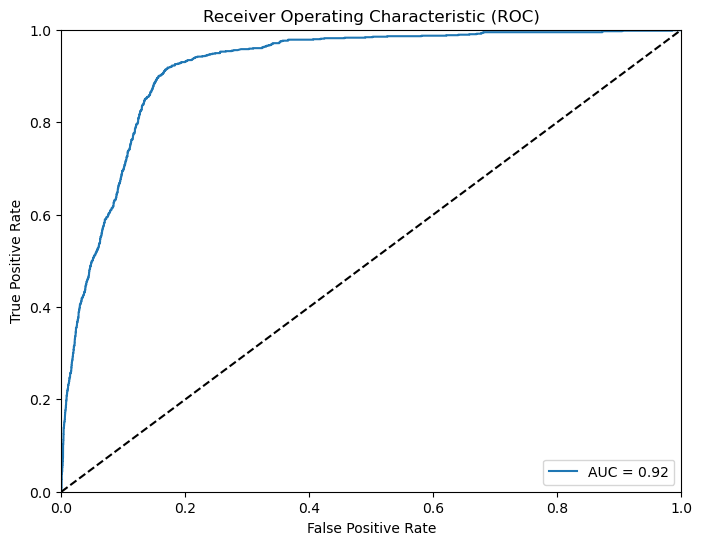

In [118]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_2, tpr_2, label=f'AUC = {roc_auc_2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [119]:
# Calculate precision-recall curve
precision_2, recall_2, thresholds_2 = precision_recall_curve(ytest_2, y_pred_proba_2)
pr_auc_2 = auc(recall_2, precision_2)

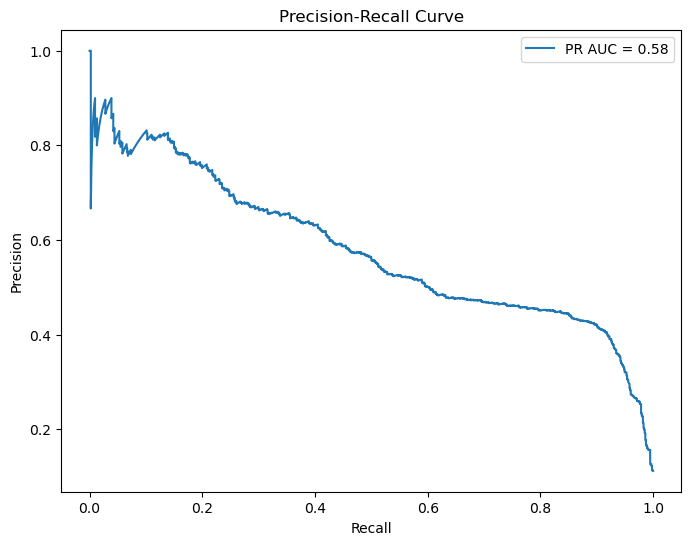

In [120]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_2, precision_2, label=f'PR AUC = {pr_auc_2:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()